<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-05/blob/main/hw_05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Прочитати файл з Google Sheets
url = "https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523"
df = pd.read_csv(url)


In [ ]:
# 2. Перші рядки
print(df.head())


   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [ ]:
# 3. Розмір таблиці
print("\nShape:", df.shape)



Shape: (8704, 25)


In [ ]:
# 4. Типи даних
print("\nDtypes:\n", df.dtypes)



Dtypes:
 N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                

In [ ]:
# 5. Частка пропусків у кожній колонці
print("\nMissing values (%):\n", df.isnull().sum() / len(df) * 100)



Missing values (%):
 N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_

In [ ]:
# 6. Видалити стовпці з пропусками, крім "Мова програмування"
cols_to_keep = ["Мова програмування"]
df_clean = df.dropna(axis=1, how='any').join(df[cols_to_keep])


In [ ]:
# 7. Перевірка пропусків
print("\nMissing values after cleaning:\n", df_clean.isnull().sum() / len(df_clean) * 100)



Missing values after cleaning:
 N                                    0.000000
Посада                               0.000000
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
Мова програмування                  44.232537
dtype: float64


In [ ]:
# 8. Видалити рядки без пропусків у вихідній таблиці
df_dropna = df.dropna()


In [ ]:
# 9. Новий розмір таблиці
print("\nShape after dropna:", df_dropna.shape)



Shape after dropna: (0, 25)


In [ ]:
# 10. Створити python_data
python_data = df[df["Мова програмування"] == "Python"]


In [ ]:
# 11. Розмір python_data
print("\nPython data shape:", python_data.shape)



Python data shape: (207, 25)


In [ ]:
# 12. Групування за посадою
grouped = python_data.groupby("Посада")



Min/Max salary by position:
                      Посада  min_salary  max_salary
0  Junior Software Engineer         100        1250
1  Senior Software Engineer        1300        9200
2         Software Engineer         500        5400
3          System Architect        3000        5000
4            Technical Lead        1425        6200


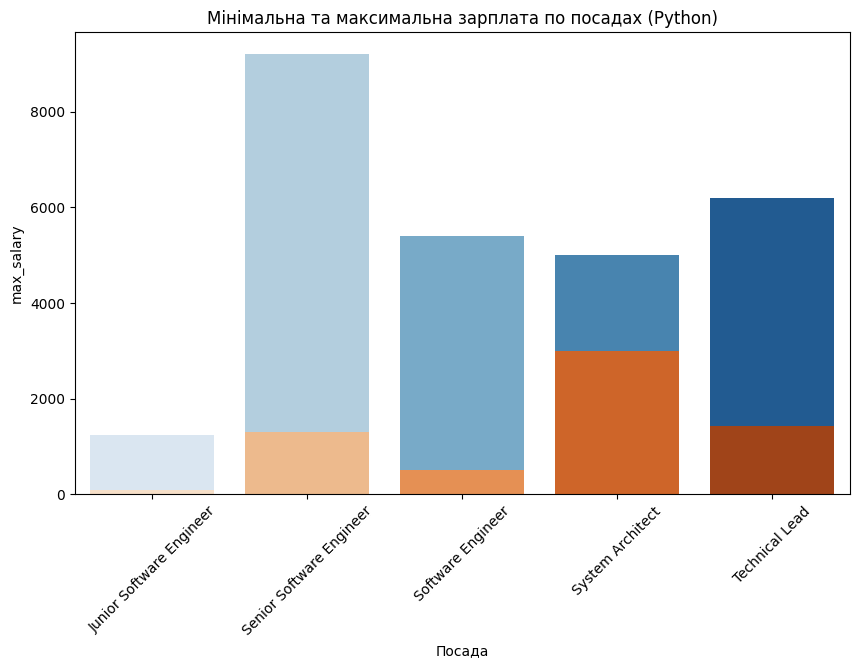

In [ ]:
# 13. Мін/макс зарплата по кожній посаді
agg_salary = grouped.agg(
    min_salary=("Зарплата на місяць", "min"),
    max_salary=("Зарплата на місяць", "max")
).reset_index()

print("\nMin/Max salary by position:\n", agg_salary)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=agg_salary,
    x="Посада", y="max_salary",
    hue="Посада", palette="Blues", legend=False
)
sns.barplot(
    data=agg_salary,
    x="Посада", y="min_salary",
    hue="Посада", palette="Oranges", legend=False
)
plt.xticks(rotation=45)
plt.title("Мінімальна та максимальна зарплата по посадах (Python)")
plt.show()


In [ ]:
# 14. Функція для середньої зарплати
def fill_avg_salary(row):
    return (row["min_salary"] + row["max_salary"]) / 2

agg_salary["avg"] = agg_salary.apply(fill_avg_salary, axis=1)


In [ ]:
# 15. Описова статистика по "avg"
print("\nDescribe avg:\n", agg_salary["avg"].describe())



Describe avg:
 count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [ ]:
# 16. Збереження таблиці
agg_salary.to_csv("agg_salary.csv", index=False)


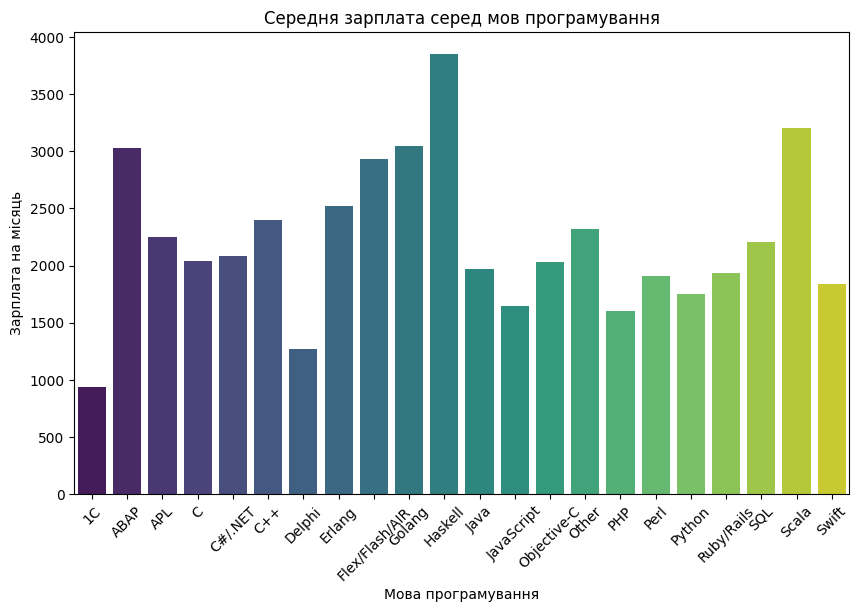

In [ ]:
# Графік середня зарплата серед мов програмування
avg_salary_lang = df.groupby("Мова програмування")["Зарплата на місяць"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_salary_lang,
    x="Мова програмування", y="Зарплата на місяць",
    hue="Мова програмування", palette="viridis", legend=False
)
plt.xticks(rotation=45)
plt.title("Середня зарплата серед мов програмування")
plt.show()


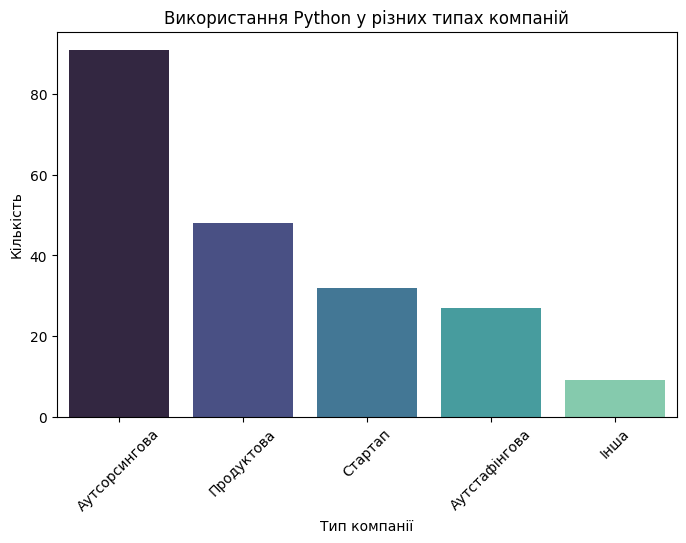

In [ ]:
# Графік використання Python у різних типах компаній
python_company = df[df["Мова програмування"] == "Python"]["Тип компанії"].value_counts().reset_index()
python_company.columns = ["Тип компанії", "Кількість"]

plt.figure(figsize=(8,5))
sns.barplot(
    data=python_company,
    x="Тип компанії", y="Кількість",
    hue="Тип компанії", palette="mako", legend=False
)
plt.xticks(rotation=45)
plt.title("Використання Python у різних типах компаній")
plt.show()
